In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

import sys
sys.path.append("../")

from src.visualization import plot_waveforms

# plot_waveforms

In [2]:
with open("../data/visualization/phenotype_model.pickle", 'rb') as f:
    phenotype_model = pickle.load(f)
    
with open("../data/visualization/phenotype_control.pickle", 'rb') as f:
    phenotype_control = pickle.load(f)

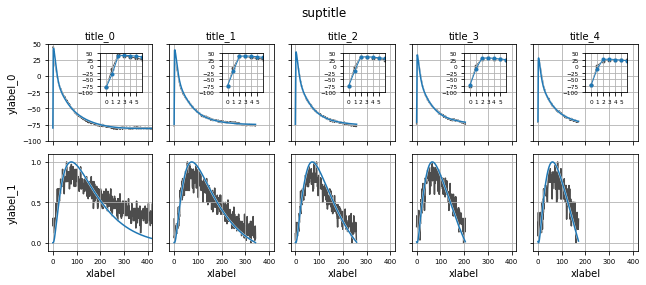

In [3]:
plot_waveforms(phenotype_model, phenotype_control,
               xlim=[-20, 420], xticks=np.arange(0, 420, 100),
               yticks_list=[np.arange(-100, 56, 25), None],
               ylim_list=[[-100, 50], [-0.1, 1.1]],
               titles=[f'title_{i}' for i in range(len(phenotype_control))],
               ylabels=[f'ylabel_{i}' for i in range(len(phenotype_control[0]))],
               xlabel='xlabel', suptitle='suptitle',
               inset_row_indices=[0], xlim_inset=[-1, 6], xticks_inset=np.arange(0, 6));

# Bondarenko_results

In [4]:
def markers(time, AP):
    names = ['Е_макс, мВ', 'ПД, мВ', 'ПП, мВ', 'ДПД_20, мс', 'ДПД_50, мс', 'ДПД_90, мс',
 'ОДПД, мс', 'dV/dt_макс, В/с']
    RMP = np.min(AP[np.nonzero(time > 20)])
    Vpeak = np.max(AP)
    dVdt = np.divide(np.diff(AP), np.diff(time))
    #print(np.diff(time))
    dVdt_max = np.max(dVdt)
    AP_delta = Vpeak - RMP
    AP_normalized = (AP - RMP)/AP_delta
    APD90 = np.max(time[AP_normalized>0.1]) - np.min(time[AP_normalized>0.1])
    APD50 = np.max(time[AP_normalized>0.5]) - np.min(time[AP_normalized>0.5])
    APD20 = np.max(time[AP_normalized>0.8]) - np.min(time[AP_normalized>0.6])
    raw = [RMP, Vpeak, AP_delta, APD20, APD50, APD90, dVdt_max]
    formatted = ["%.1f" % Vpeak ,"%.1f" % AP_delta,
                 "%.1f" % RMP,"%.1f" %  APD20,
                 "%.1f" % APD50, "%.1f" % APD90,
                 "200", "%.1f" % dVdt_max]
    return {"raw":raw, "formatted":formatted, "names":names}

In [5]:
res_dirname = "/home/common/pikunov.av/rybashlykov/pypoptim/results/bondarenko/syn/"
case_dirname = "210514_113658"
case_dirname = "210514_153536"
ref_dirname = "/home/common/pikunov.av/rybashlykov/pypoptim/data/bondarenko/syn/phenotypes/"
ref_filename = "phenotype_200.csv"
genes = pd.read_csv(res_dirname + case_dirname + "/genes_best.csv")
data = pd.read_csv(res_dirname + case_dirname + "/phenotype/phenotype_200.csv")
ref = pd.read_csv(ref_dirname + ref_filename)

In [6]:
genes

,ec_name,g_name,0
0,common,gna,0.683305
1,common,knaca,3.680437
2,common,inakmax,9.863766
3,common,ipcamax,9.994604
4,common,gcab,0.026393
5,common,gnab,0.011304
6,common,gks,5.926016
7,common,gkto,2.431784
8,common,gkr,0.012282
9,common,gclca,9.878356


In [7]:
for i, row in enumerate(genes.iterrows()):
    a = row

In [8]:
a[1]['0']

0.5139939160503034

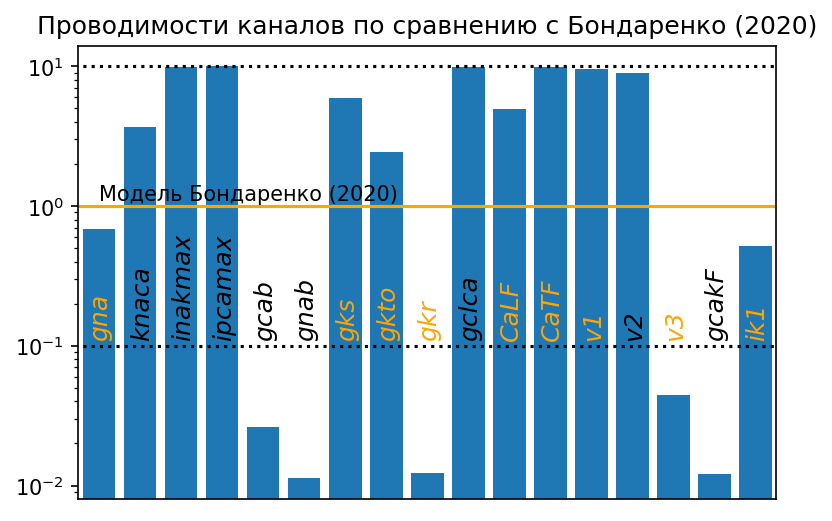

In [9]:
fig, ax = plt.subplots(dpi = 150)
ax.set_xticks(ticks = [])
x = np.linspace(0,16, 17)
ax.bar(np.linspace(0,16, 17), genes['0'], log = True)
ax.set_xlim(-0.5,16.5)
ax.plot(np.linspace(-1,17, 17), np.linspace(0.1, 0.1, 17), ':', color = 'black')
ax.plot(np.linspace(-1,17, 17), np.linspace(10, 10, 17), ':', color = 'black')
ax.plot(np.linspace(-1,17, 17), np.linspace(1, 1, 17), color = 'orange')
ax.text(0, 1.1, "Модель Бондаренко (2020)")
ax.set_title("Проводимости каналов по сравнению с Бондаренко (2020)")
colors = ['orange', 'black', 'black', 'black', 'black', 'black', 'orange',
          'orange', 'orange', 'black', 'orange', 'orange', 'orange', 'black', 'orange', 'black', 'orange']
for i, row in enumerate(genes.iterrows()):
    plt.text(x[i]-0.25, 0.12, row[1]['g_name'], fontsize = 12, rotation=90, color = colors[i], style = 'italic')
plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

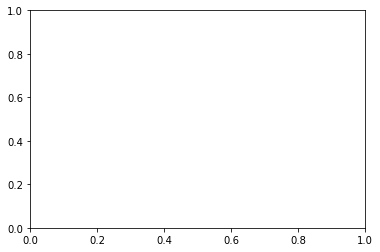

In [10]:
plt.xticks()

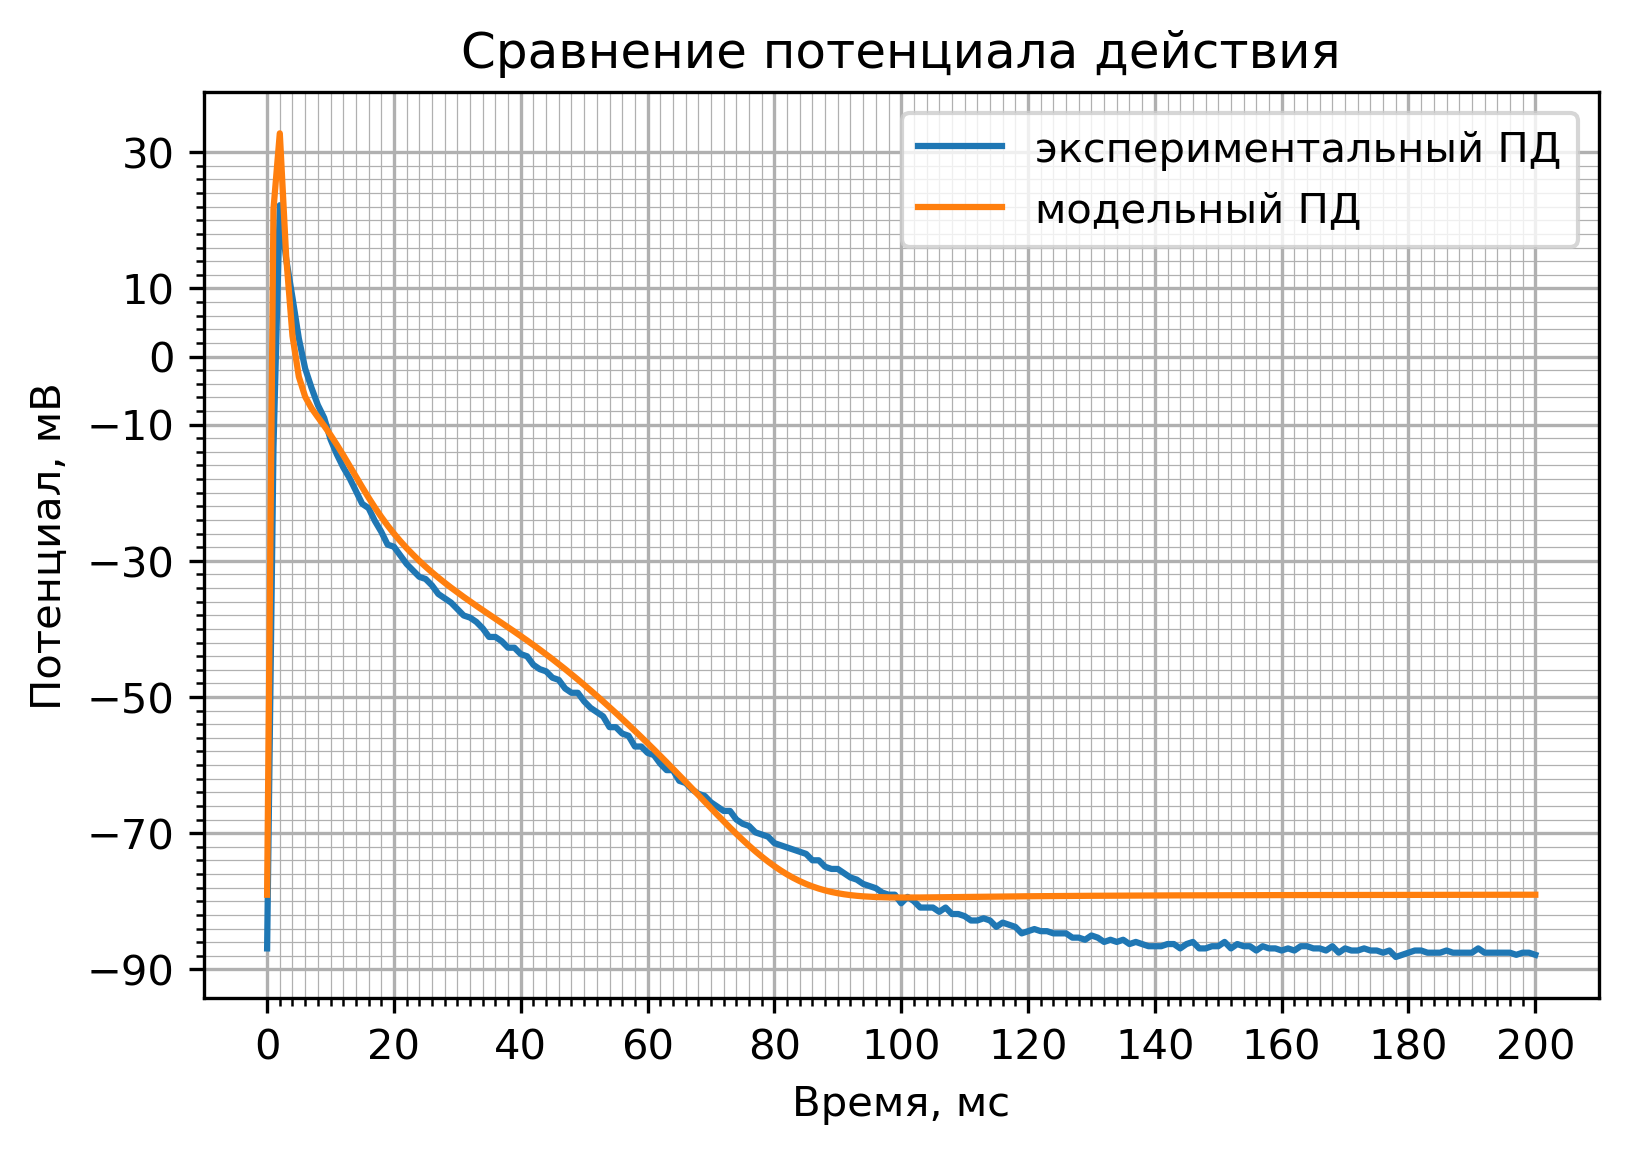

In [11]:
fig, ax = plt.subplots(dpi = 300)
ax.plot(ref['V'])
ax.plot(data['V'])
ax.set_xlabel("Время, мс")
ax.set_ylabel("Потенциал, мВ")
ax.legend(["экспериментальный ПД", "модельный ПД"])
major_xticks = np.linspace(0, 200, 11)
minor_xticks = np.linspace(0, 200, 101)
major_yticks = np.linspace(-90, 30, 7)
minor_yticks = np.linspace(-90, 30, 61)
ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor = True)
ax.set_yticks(np.append(major_yticks, 0))
ax.set_yticks(minor_yticks, minor = True)
ax.grid(which = 'major')
ax.grid(which = 'minor', linewidth = 0.3)
ax.set_title("Сравнение потенциала действия")
plt.show()

In [12]:
AP = data['V'].values
time = np.linspace(0, 200, 201)
model_markers = markers(time, AP)
AP = ref['V'].values
ref_markers = markers(time, AP)

In [13]:
table = np.array(list(zip(model_markers['names'], ref_markers['formatted'], model_markers['formatted'])))
table = pd.DataFrame(table, columns = ["маркер","эксперимент","модель"])

In [14]:
table

,маркер,эксперимент,модель
0,"Е_макс, мВ",22.2,32.8
1,"ПД, мВ",110.4,112.2
2,"ПП, мВ",-88.2,-79.4
3,"ДПД_20, мс",4.0,2.0
4,"ДПД_50, мс",24.0,16.0
5,"ДПД_90, мс",92.0,70.0
6,"ОДПД, мс",200,200
7,"dV/dt_макс, В/с",73.5,100.7
